<a href="https://colab.research.google.com/github/LuisR-jpg/School/blob/master/Machine%20Learning%20I/Adults/Adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Adults

## Libraries and Dataframe

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pandas.read_csv('../Datasets/adult.csv')
df = pandas.read_csv('/content/adult.csv')
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


## Entropy

$ H(x) = - \sum_x P(x) log_2 P(x) $

In [5]:
def H(x):
    m = len(x)
    values, counts = np.unique(x, return_counts = True)
    nCategories = len(values)
    probabilities = counts/m
    h = -np.sum(probabilities*np.log2(probabilities))
    hMax = -np.log2(1/nCategories)
    return h, hMax

In [6]:
entropyAge = H(df['age'].values)
print("Entropy =", entropyAge[0], ";\tmaxEntropy =", entropyAge[1])

Entropy = 5.683324396400329 ;	maxEntropy = 6.189824558880018


In [7]:
valuesEntropy = np.zeros((len(df.columns), 2))
for i, f in enumerate(df.columns):
    entropy = H(df[f].values)
    valuesEntropy[i][0] = entropy[0]
    valuesEntropy[i][1] = entropy[1]
pandas.DataFrame(valuesEntropy, columns = ['Entropy', 'maxEntropy'], index = df.columns)

,Entropy,maxEntropy
age,5.683324,6.189825
workclass,1.647977,3.169925
education,2.931351,4.000000
education-num,2.931351,4.000000
marital-status,1.833649,2.807355
occupation,3.516903,3.906891
relationship,2.154424,2.584963
race,0.798741,2.321928
sex,0.915736,1.000000
hours-per-week,3.479565,6.554589


## Mutual Information

$ IM(x, y) = \sum_x \sum_y P(x, y) log_2 \frac{ P(x, y) }{ P(x)P(y) } $

In [8]:
def IM(x, y):
    df = pandas.DataFrame([x, y]).transpose().value_counts().reset_index().rename(columns={0: 'P(x, y)'})
    df['P(x, y)'] = df['P(x, y)']/df['P(x, y)'].sum()
    pX = df.groupby(x.name).sum()['P(x, y)'].to_dict()
    pY = df.groupby(y.name).sum()['P(x, y)'].to_dict()
    df['P(x)'] = [pX[iX] for iX in df[x.name]]
    df['P(y)'] = [pY[iY] for iY in df[y.name]]
    df['MI'] = df['P(x, y)']*np.log2(df['P(x, y)']/(df['P(x)']*df['P(y)']))
    return df['MI'].sum()

In [9]:
valuesMI = np.zeros((len(df.columns), len(df.columns)))
for i, fUno in enumerate(df.columns):
    for j, fDos in enumerate(df.columns):
        if fUno != fDos:
            valuesMI[i][j] = IM(df[fUno], df[fDos])
matrixMI = pandas.DataFrame(valuesMI, columns = df.columns, index = df.columns)
matrixMI

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
age,0.000000,0.089621,0.166403,0.166403,0.355410,0.125678,0.289065,0.009931,0.012833,0.250289,0.057332,0.099218
workclass,0.089621,0.000000,0.047141,0.047141,0.031334,0.471202,0.035284,0.010107,0.018833,0.089113,0.013488,0.021572
education,0.166403,0.047141,0.000000,2.931351,0.034507,0.322677,0.054353,0.014904,0.006852,0.084368,0.077934,0.093591
education-num,0.166403,0.047141,2.931351,0.000000,0.034507,0.322677,0.054353,0.014904,0.006852,0.084368,0.077934,0.093591
marital-status,0.355410,0.031334,0.034507,0.034507,0.000000,0.077623,1.046677,0.018547,0.163419,0.077928,0.017175,0.156528
occupation,0.125678,0.471202,0.322677,0.322677,0.077623,0.000000,0.121359,0.018315,0.143273,0.179617,0.042093,0.092922
relationship,0.289065,0.035284,0.054353,0.054353,1.046677,0.121359,0.000000,0.024373,0.394068,0.112325,0.018312,0.165366
race,0.009931,0.010107,0.014904,0.014904,0.018547,0.018315,0.024373,0.000000,0.009555,0.020489,0.141463,0.008378
sex,0.012833,0.018833,0.006852,0.006852,0.163419,0.143273,0.394068,0.009555,0.000000,0.057676,0.003351,0.037171
hours-per-week,0.250289,0.089113,0.084368,0.084368,0.077928,0.179617,0.112325,0.020489,0.057676,0.000000,0.043542,0.061002


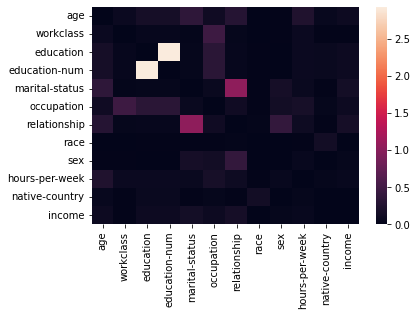

In [10]:
sns.heatmap(matrixMI)

## Count plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


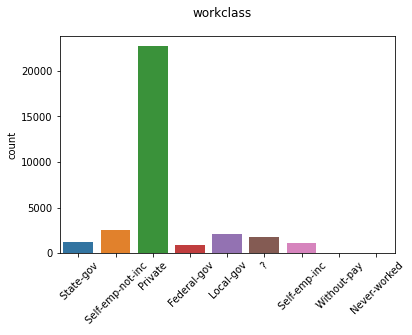

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


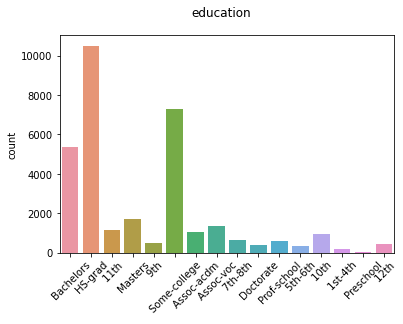

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


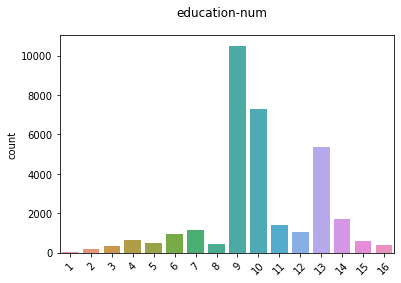

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


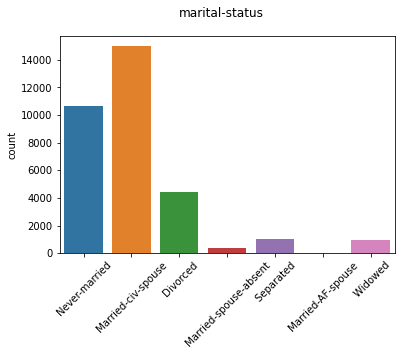

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


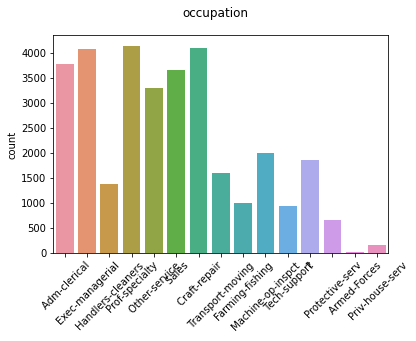

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


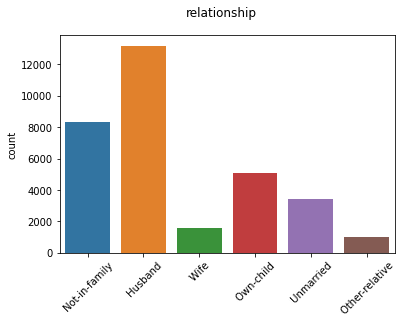

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


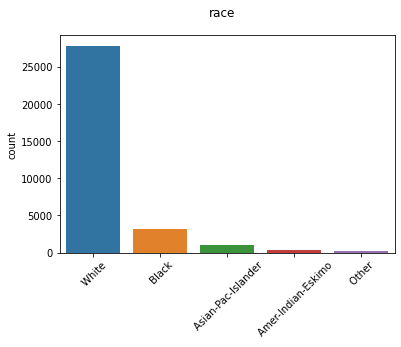

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


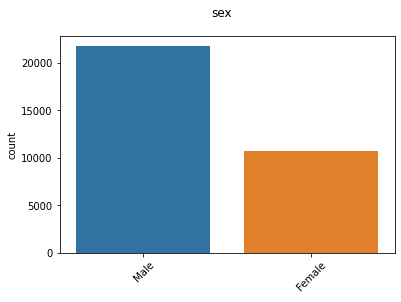

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


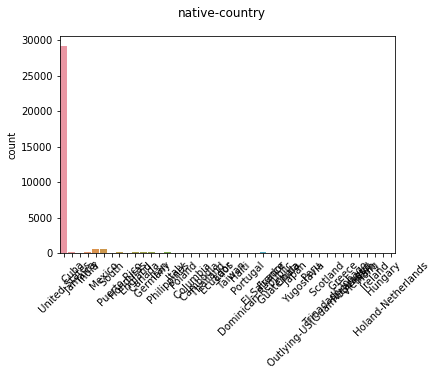

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


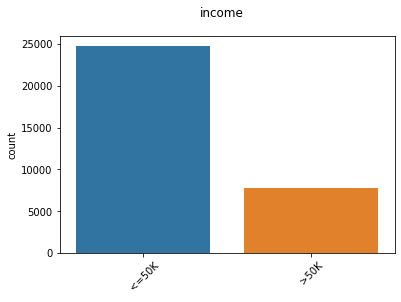

In [21]:
for f in df.columns:
  if f == 'age' or f == 'hours-per-week': continue
  a = plt.figure()
  plt.suptitle(f)
  a = sns.countplot(df[f].values)
  plt.xticks(rotation=45)
  plt.show()

## Comparing two features: Hours per week vs Workclass

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

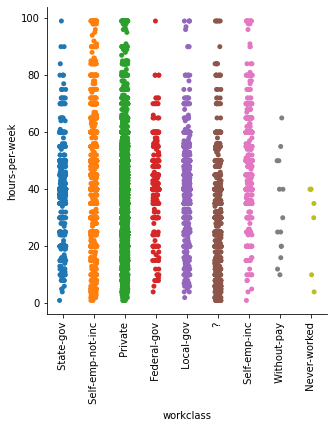

In [43]:
sns.catplot(data = df, y = 'hours-per-week', x = 'workclass')
plt.xticks(rotation=90)

It's possible to see that self-employees-not-incorporated and private employees are the ones with more frequency in working ~100 hrs.

A possible reason is that this kind of position could be anything, it's not very specific.

## Insights

> ### The education through time

I'm glad to see that 70 years ago everyone got really stable talking about education. It's understandable that our grandparents weren't able to study as much as we can these times and the fact that people around there 20 don't have a huge degree makes me trust on this dataset.

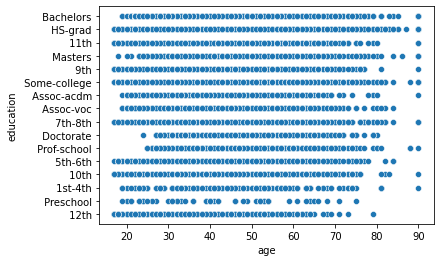

In [44]:
sns.scatterplot(data = df, x = 'age', y = 'education')

> ### Impressive results

I'm adding this graph because I wasn't expecting to see that people with a degree close to college but not concluded are the ones that work the most.

Seeing that higher degrees work less time is inspiring.

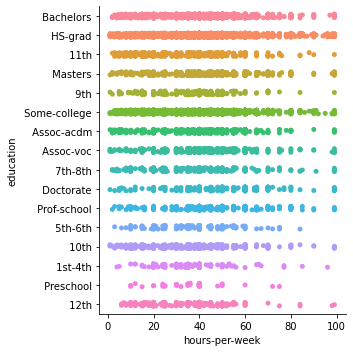

In [45]:
sns.catplot(data = df, x = 'hours-per-week', y = 'education')